In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection  import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')


In [53]:
df=pd.read_csv("heart.csv")

In [54]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [55]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
age         1025 non-null int64
sex         1025 non-null int64
cp          1025 non-null int64
trestbps    1025 non-null int64
chol        1025 non-null int64
fbs         1025 non-null int64
restecg     1025 non-null int64
thalach     1025 non-null int64
exang       1025 non-null int64
oldpeak     1025 non-null float64
slope       1025 non-null int64
ca          1025 non-null int64
thal        1025 non-null int64
target      1025 non-null int64
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [57]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [58]:
 print(df.nunique())

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64


In [59]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [60]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [61]:
from scipy.stats import zscore
zscore=abs(zscore(df))
print(df.shape)
df_final=df.loc[(zscore<3).all(axis=1)]
print(df_final.shape)

(1025, 14)
(969, 14)


In [62]:
df_final.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.077902,-0.059286,0.297992,0.183075,0.133062,-0.120585,-0.387504,0.101872,0.191232,-0.153518,0.370247,0.058987,-0.227225
sex,-0.077902,1.000000,-0.047771,-0.057017,-0.138614,0.041548,-0.107043,-0.057927,0.145631,0.155104,-0.051484,0.130724,0.235699,-0.303739
cp,-0.059286,-0.047771,1.000000,0.061996,-0.097779,0.102924,0.038883,0.297609,-0.390493,-0.135320,0.090084,-0.216786,-0.157708,0.408999
trestbps,0.297992,-0.057017,0.061996,1.000000,0.142566,0.167518,-0.099957,-0.064813,0.054314,0.144384,-0.097033,0.060339,0.023259,-0.114757
chol,0.183075,-0.138614,-0.097779,0.142566,1.000000,0.013029,-0.095590,-0.041939,0.085599,0.038335,0.001309,0.117465,0.051000,-0.112342
fbs,0.133062,0.041548,0.102924,0.167518,0.013029,1.000000,-0.094705,-0.009113,0.013031,0.005646,-0.045372,0.156300,-0.020786,-0.023629
restecg,-0.120585,-0.107043,0.038883,-0.099957,-0.095590,-0.094705,1.000000,0.061232,-0.066541,-0.028290,0.081653,-0.095432,0.004146,0.127580
thalach,-0.387504,-0.057927,0.297609,-0.064813,-0.041939,-0.009113,0.061232,1.000000,-0.395719,-0.357793,0.386290,-0.299275,-0.120972,0.429920
exang,0.101872,0.145631,-0.390493,0.054314,0.085599,0.013031,-0.066541,-0.395719,1.000000,0.319344,-0.248610,0.153337,0.216089,-0.429825
oldpeak,0.191232,0.155104,-0.135320,0.144384,0.038335,0.005646,-0.028290,-0.357793,0.319344,1.000000,-0.542464,0.267879,0.165459,-0.431854


In [63]:
df_final.skew()

age        -0.231922
sex        -0.883378
cp          0.534378
trestbps    0.545720
chol        0.250140
fbs         2.037533
restecg     0.184201
thalach    -0.435104
exang       0.688561
oldpeak     0.937731
slope      -0.475267
ca          1.152942
thal       -0.250235
target     -0.072399
dtype: float64

In [64]:
for col in df_final.columns:
    if df_final.skew().loc[col]>0.55:
        df_final[col]=np.log1p(df_final[col])
df_final.skew()

age        -0.231922
sex        -0.883378
cp          0.534378
trestbps    0.545720
chol        0.250140
fbs         2.037533
restecg     0.184201
thalach    -0.435104
exang       0.688561
oldpeak     0.292036
slope      -0.475267
ca          0.706179
thal       -0.250235
target     -0.072399
dtype: float64

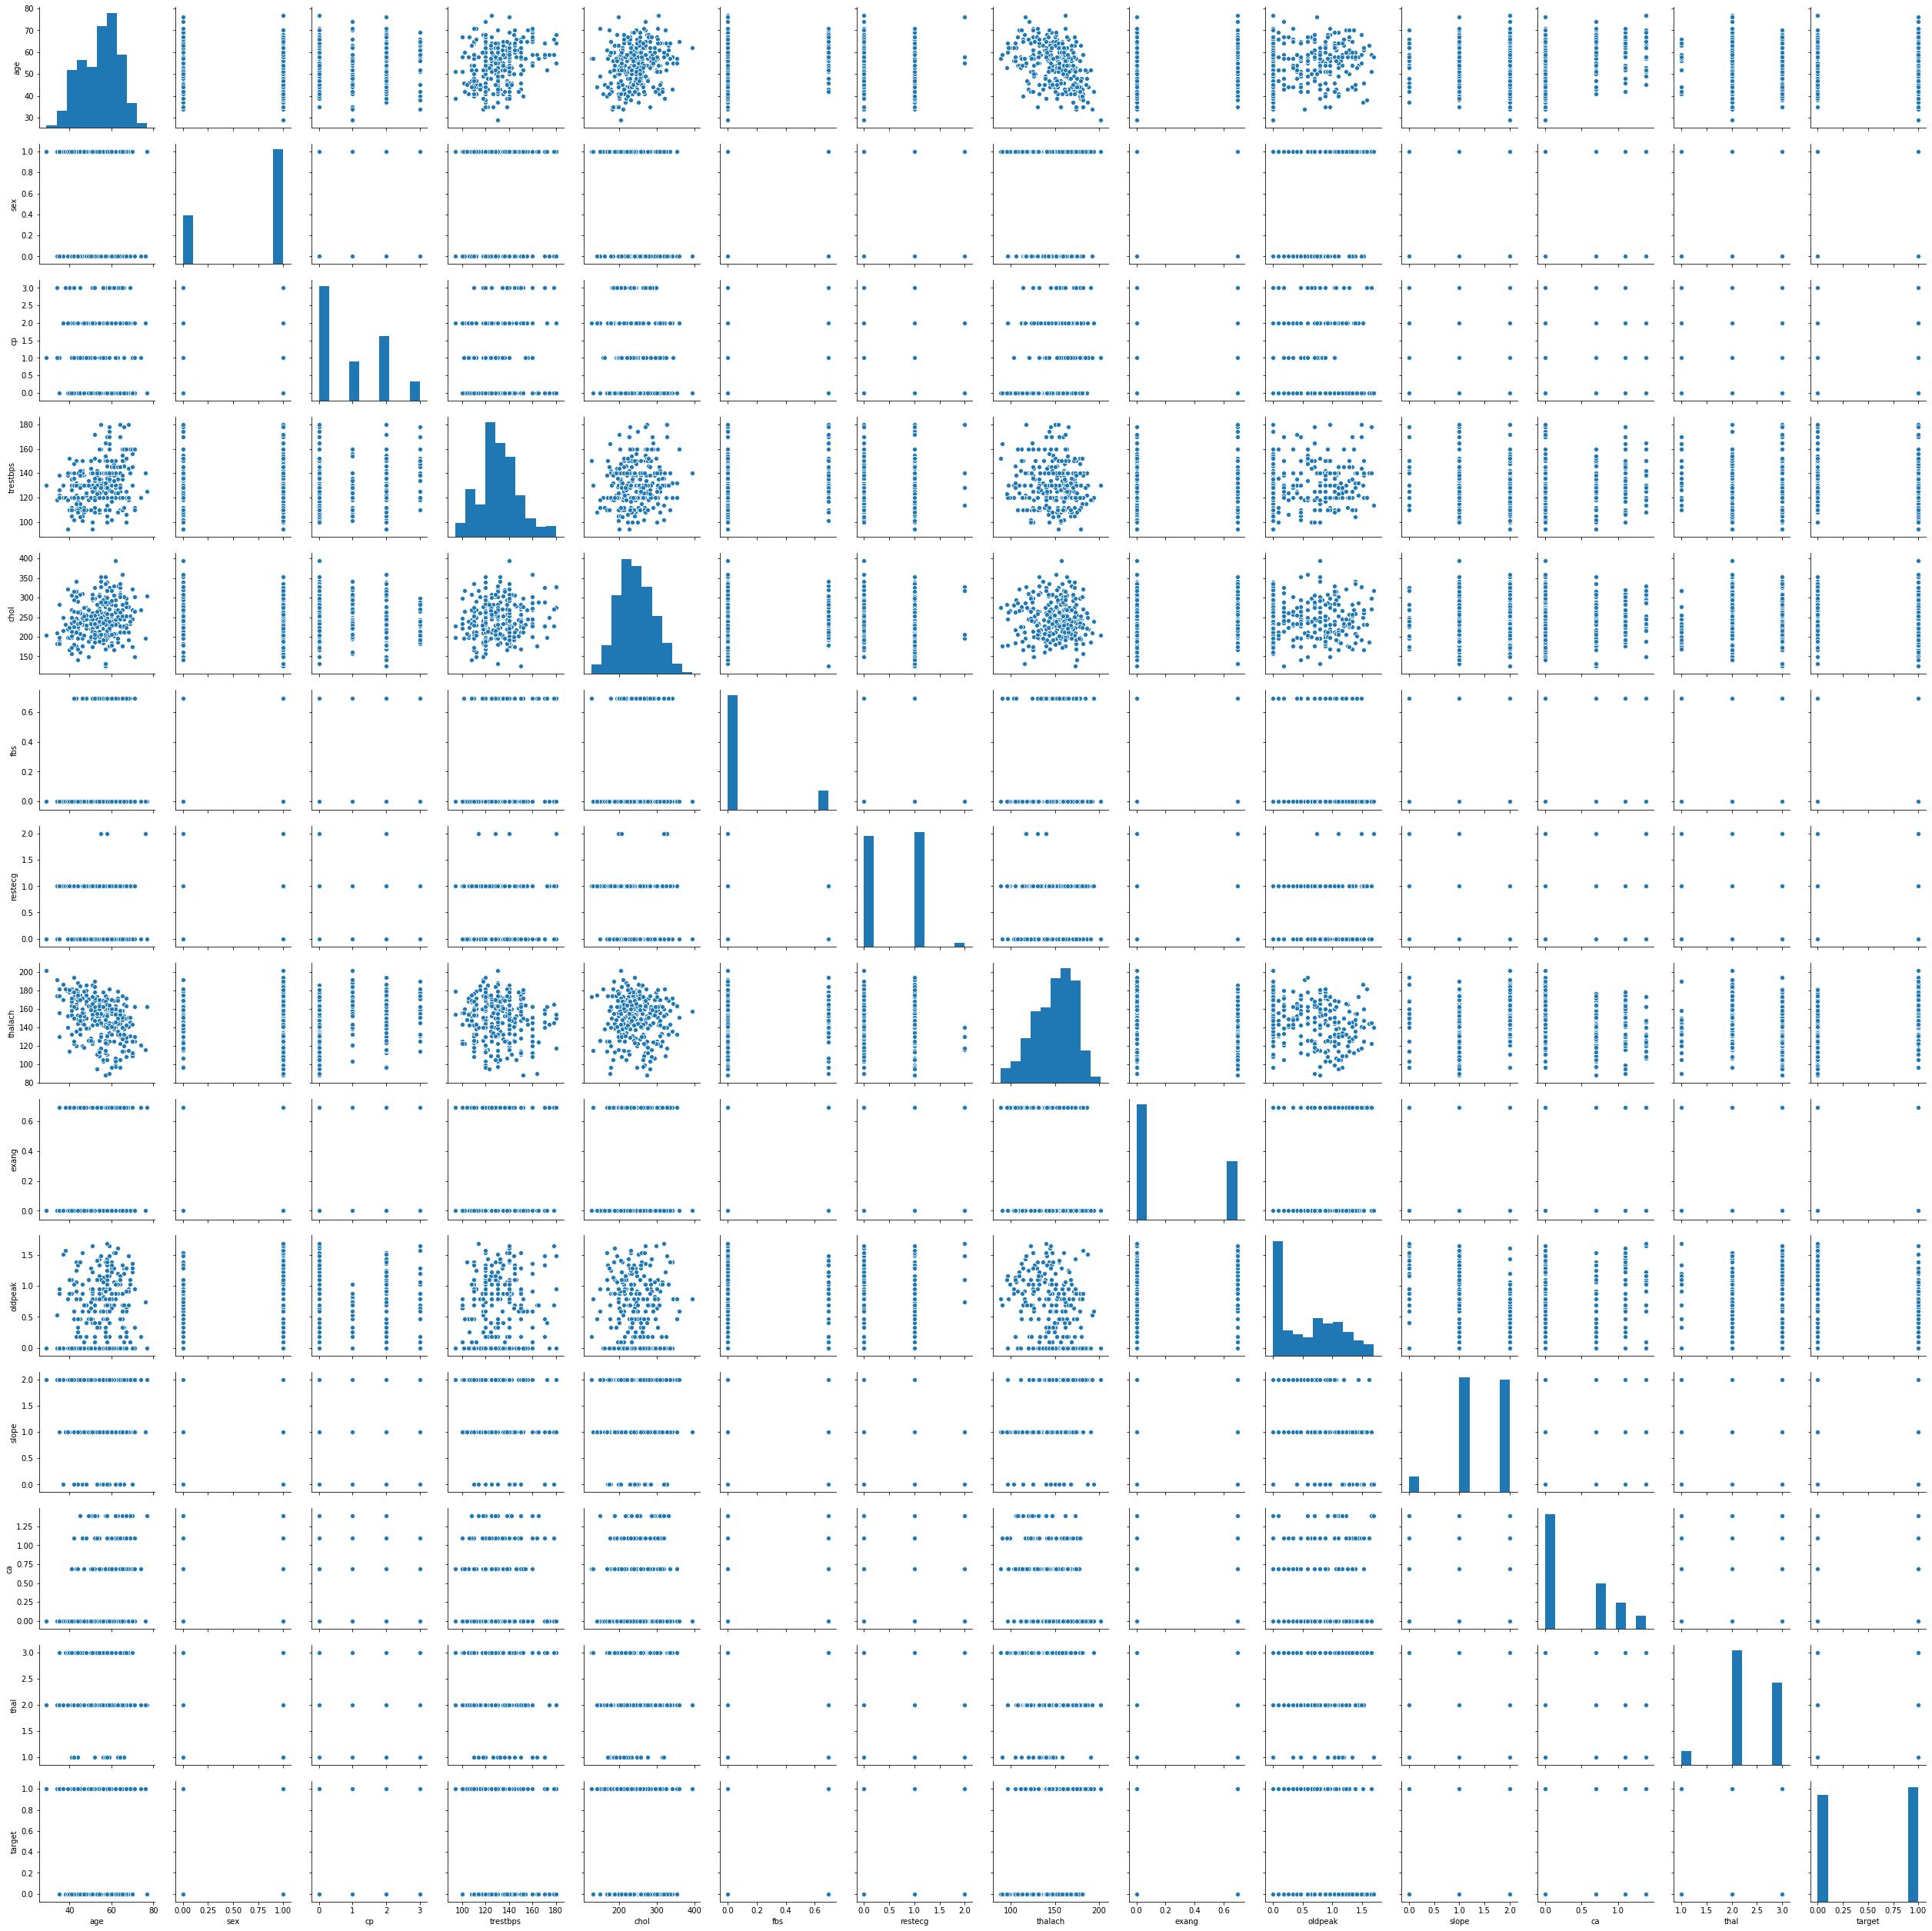

In [65]:
sns.pairplot(df_final)
plt.show()

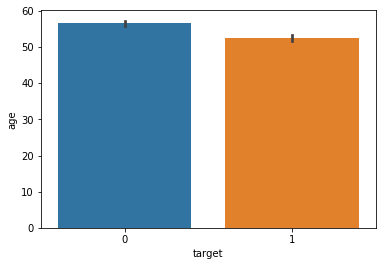

In [66]:
sns.barplot(x="target",y="age",data=df_final)
plt.show()


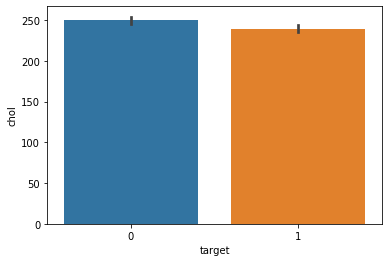

In [67]:
sns.barplot(x="target",y="chol",data=df_final)
plt.show()

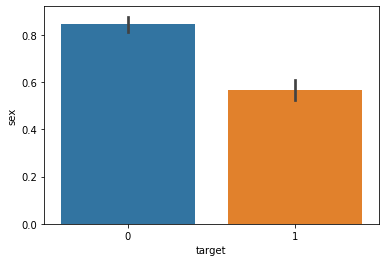

In [68]:
sns.barplot(x="target",y="sex",data=df_final)
plt.show()   

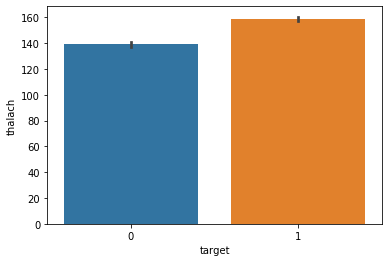

In [69]:
sns.barplot(x="target",y="thalach",data=df_final)
plt.show()

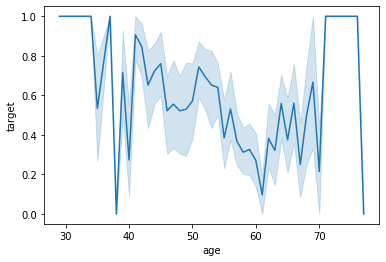

In [70]:
sns.lineplot(x="age",y="target",data=df_final)
plt.show()

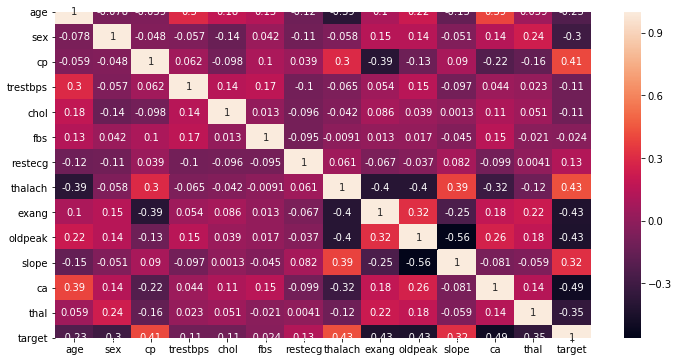

In [73]:
plt.figure(figsize=(12,6))
sns.heatmap(df_final.corr(),annot=True)

In [74]:
x=df_final.drop(columns=["target"])
y=df_final[["target"]]

In [75]:
 x_train, x_test,y_train,y_test = train_test_split(x,y,random_state = 55,test_size=0.20)

In [76]:
x_train.shape

(775, 13)

In [77]:
x_test.shape

(194, 13)

In [78]:
y_train.shape

(775, 1)

In [79]:
y_test.shape

(194, 1)

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
lg=LogisticRegression()

In [81]:
lg.fit(x_train,y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
lg.score(x_train,y_train)

0.8696774193548387

In [83]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

from sklearn.metrics import confusion_matrix
from sklearn.model_selection  import cross_val_score
from sklearn.model_selection import cross_validate
predicted = cross_val_predict(lg, x, y, cv=10)
metrics.accuracy_score(y, predicted) 

from sklearn.model_selection import cross_validate
accuracy = cross_val_score(lg, x, y, cv=10,scoring='accuracy')
print (accuracy)
print (cross_val_score(lg, x, y, cv=10,scoring='accuracy').mean())

[0.87628866 0.89690722 0.87628866 0.82474227 0.8556701  0.92783505
 0.84536082 0.87628866 0.81443299 0.82291667]
0.8616731099656357


In [84]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(cross_val_score(lg, x, y, cv=10, scoring='accuracy').mean())

0.8616731099656357


In [85]:
pred=lg.predict(x_test)
print(pred)

[0 1 1 0 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 1
 0 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 0
 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1
 1 1 0 0 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1
 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 1 1 0 0 1 0
 1 0 1 1 0 1 1 1 1]


In [86]:
print("accuracy_score",accuracy_score(pred,y_test))

accuracy_score 0.9072164948453608


In [87]:
print(confusion_matrix(y_test,pred))

[[82  9]
 [ 9 94]]


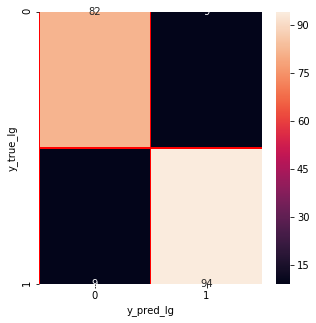

In [88]:
from sklearn.metrics import confusion_matrix
y_pred_lg = lg.predict(x_test)
y_true_lg = y_test
cm = confusion_matrix(y_true_lg, y_pred_lg)
f, ax = plt.subplots(figsize =(5,5))
sns.heatmap(cm,annot = True,linewidths=0.5,linecolor="red",fmt = ".0f",ax=ax)
plt.xlabel("y_pred_lg")
plt.ylabel("y_true_lg")
plt.show()

In [89]:
from sklearn.externals import joblib
joblib.dump(lg, "lg_heart.pk1")

['lg_heart.pk1']